In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler            #importing all necessary libraries


Using TensorFlow backend.


In [2]:
df=pd.read_csv('mac_1.csv')

In [3]:
series=pd.DataFrame(df.x)                 #storing all the PCA reduced values in series


In [4]:

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)                      #normalize features
series = pd.DataFrame(scaled)

In [5]:
window_size = 50                          #moving window size to be 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)      #shifting the entire column up by 1
series.dropna(axis=0, inplace=True)



In [6]:
nrow = round(0.75*series.shape[0])                 #storing 75% of total data size in nrow


In [7]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]                        #dividing into train and test,75% for training

In [8]:
from sklearn.utils import shuffle
train = shuffle(train)                             


In [9]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [10]:

train_X = train_X.values
train_y = train_y.values
test_X = test_X.values                            #storing the values in particular indices
test_y = test_y.values


In [11]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)         #reshape to necessary format
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)     

In [12]:
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))   # 50 time steps to go through each PCA vector in the sentence as an input to the LSTM at each time step
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))                               
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
np.random.seed(7)

model.summary()                               #linear activaion with adam optimization and a dense layer added


/home/animesh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(50, 1), units=50)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [13]:
start = time.time()
model.fit(train_X,train_y,batch_size=20,nb_epoch=50,validation_split=0.1)
np.random.seed(7)

print("> Compilation Time : ", time.time() - start)


/home/animesh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 322 samples, validate on 36 samples
Epoch 1/50
322/322 [==============================] - 3s 10ms/step - loss: 0.0379 - val_loss: 0.0108
Epoch 2/50
322/322 [==============================] - 2s 6ms/step - loss: 0.0137 - val_loss: 0.0080
Epoch 3/50
322/322 [==============================] - 2s 7ms/step - loss: 0.0094 - val_loss: 0.0083
Epoch 4/50
322/322 [==============================] - 2s 7ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 5/50
322/322 [==============================] - 2s 7ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 6/50
322/322 [==============================] - 2s 6ms/step - loss: 0.0084 - val_loss: 0.0064
Epoch 7/50
322/322 [==============================] - 2s 6ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 8/50
322/322 [==============================] - 2s 6ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 9/50
322/322 [==============================] - 2s 7ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 10/50
322/322 [==============================] -

In [14]:
from keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open("model1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")
 

Saved model to disk


In [14]:
preds = model.predict(test_X) # Doing a prediction on all the test data at once





In [15]:
test_y=test_y.reshape(120,1)

In [16]:
actuals = scaler.inverse_transform(test_y)

preds1=scaler.inverse_transform(preds)              #convert normalized values to their original form


In [17]:
mean_squared_error(test_y,preds)                 #mean squared error for normalized values


0.04586904543548906

In [18]:
mean_squared_error(actuals,preds1)               #mean squared error for actual values


136699.55568505157

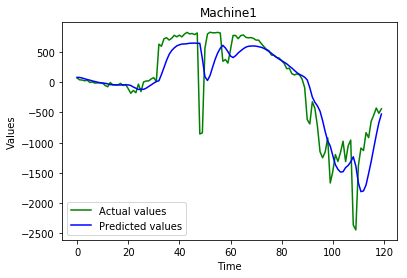

In [19]:
pyplot.plot(actuals,color='green',label='Actual values')  #actual
pyplot.plot(preds1,color='blue',label='Predicted values')    #prediction
pyplot.legend(loc='lower left')
 
plt.title('Machine1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.savefig('Machine1full.png')

pyplot.show()

In [20]:
#showing the predicted values for even indexed timestamps
time=pd.DataFrame(df.CPU1YBLPVDAKDLWAPP1)

In [21]:
li=time[408:529]
li1=[]
for i in range(60):
    li1.append(i)
x=np.array(li1)


In [22]:
z=li.CPU1YBLPVDAKDLWAPP1.tolist()
z1=np.array(z)
z1=z1[1::2]


In [23]:
act=actuals[1::2]

In [24]:
pre=preds1[1::2]

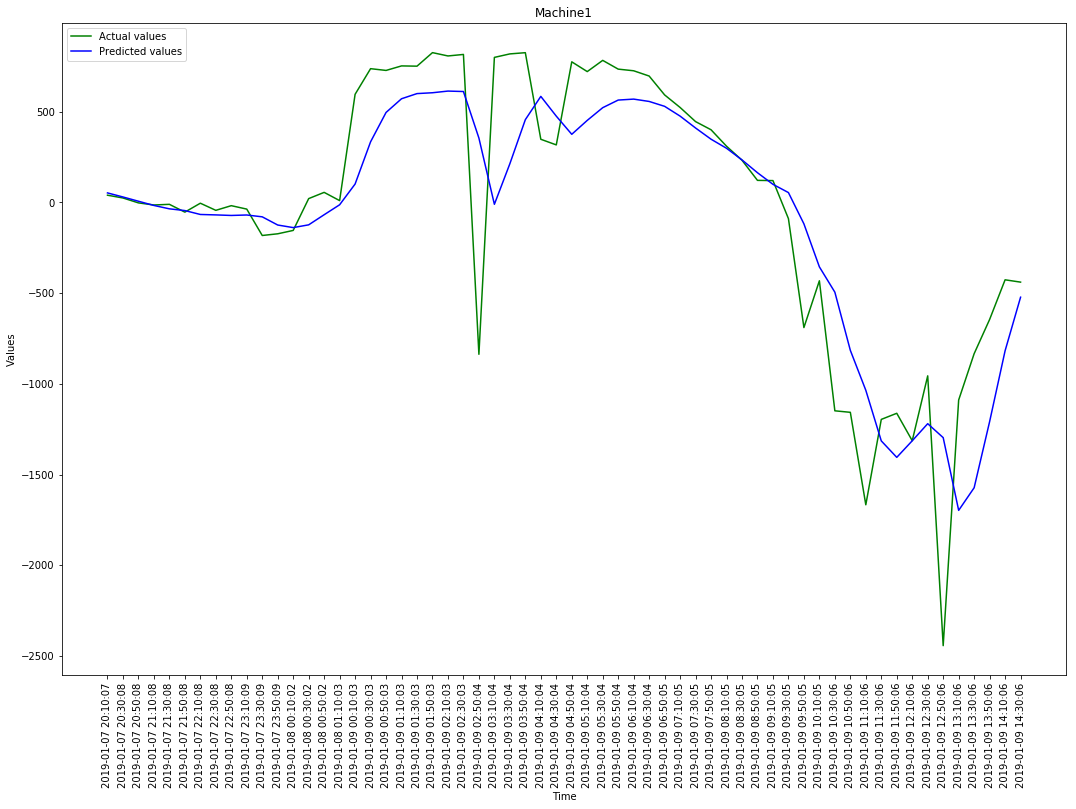

In [25]:

plt.figure(figsize=(18,12))
plt.xticks( x,z1,rotation='vertical')
pyplot.plot(x,act,color='green',label='Actual values')  #actual
pyplot.plot(x,pre,color='blue',label='Predicted values')    #prediction
pyplot.legend(loc='upper left')

plt.title('Machine1')
plt.xlabel('Time')
plt.ylabel('Values')


plt.savefig('Machine1even.png')
plt.show()
